# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [20]:
data_path = Path('./data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


## Helper: Export Directory

In [21]:
img_dir = Path('./deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


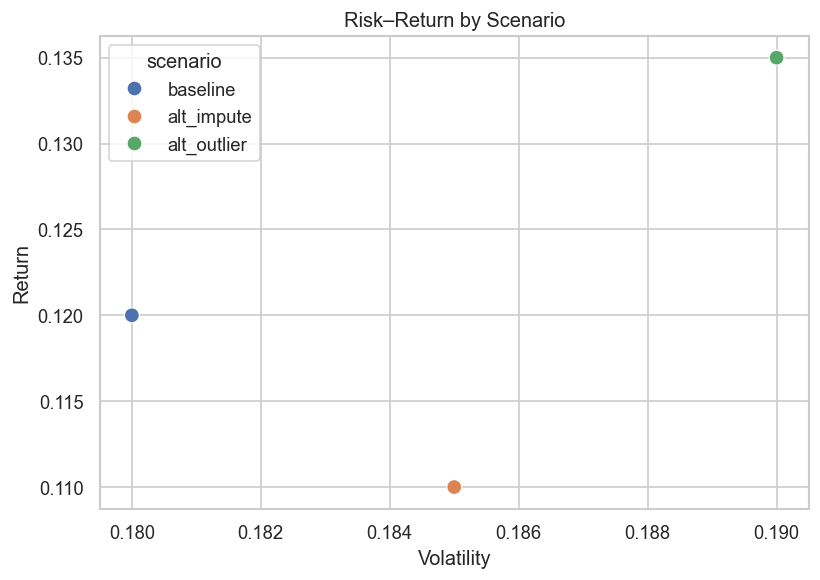

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig('risk_return.png')
plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


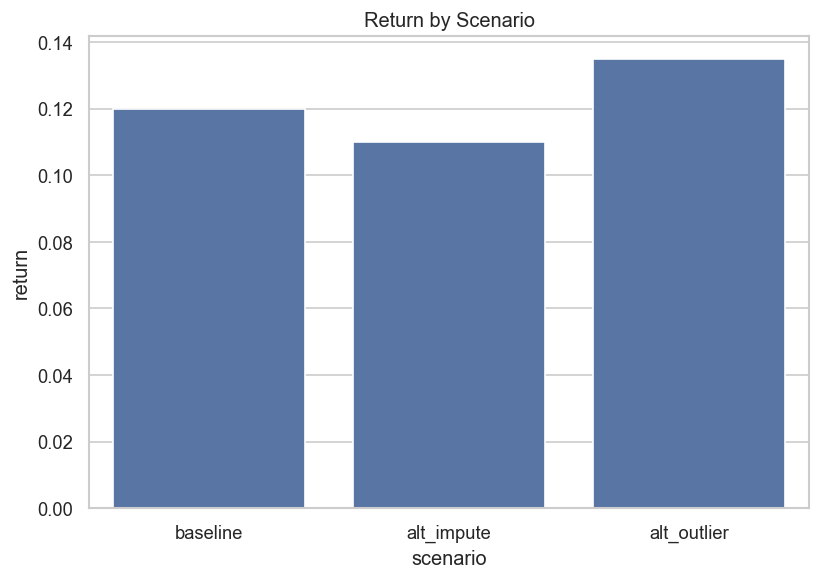

In [23]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
savefig('return_by_scenario.png')
plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


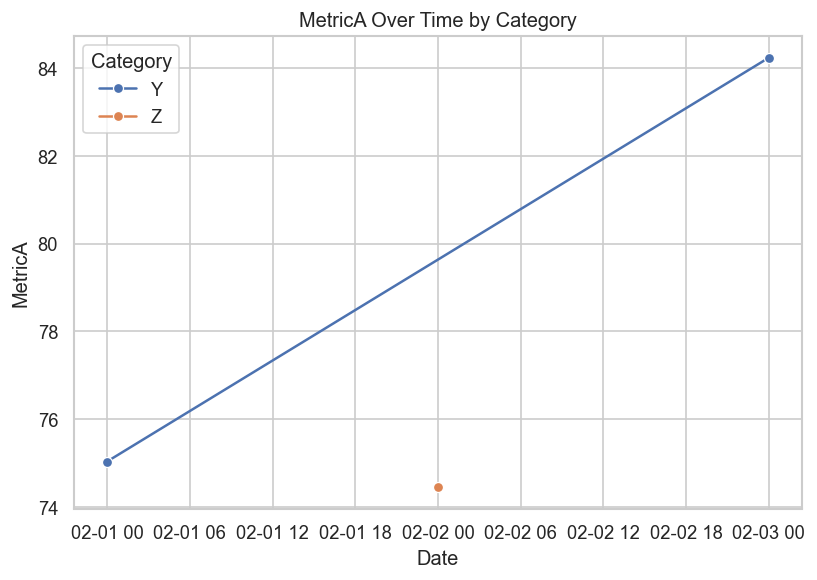

In [24]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [25]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


## Interpretations / Takeaways

Chart 1 – Risk–Return Tradeoff

Treating outliers (green) improves returns with only a slight increase in volatility.

Mean imputation (orange) results in lower returns and higher volatility, the weakest profile.

Baseline (blue) is moderate but not optimal.
→ Data cleaning decisions have a major impact on the risk–return balance.

Chart 2 – Returns by Scenario

Highest returns occur when outliers are addressed (13.5%).

Lowest returns arise under mean imputation (11%).
→ Preprocessing assumptions directly influence return outcomes, carrying real financial consequences.

Chart 3 – MetricA by Category

Category Z: ~58.8

Category Y: ~67.5

Category X: ~72.5
→ Category X consistently demonstrates stronger metrics, suggesting greater resilience and upside potential.

Assumptions & Sensitivities

Volatility is assumed to be a valid proxy for risk.

Sharpe ratio is assumed to capture performance, though it may miss tail risks.

Results are highly sensitive to preprocessing choices (e.g., imputation, outlier handling).

Limited sample size may restrict generalizability.

## Decision Implications
Opportunities

Robust outlier handling can enhance portfolio risk-adjusted returns.

Category X’s stronger MetricA performance suggests it may warrant investment focus or deeper analysis.

Risks

Simple imputation methods (e.g., mean) lower performance and may introduce bias.

Heavy reliance on the Sharpe ratio risks overlooking tail events.

Small sample size limits confidence and calls for validation with larger datasets.

Recommended Next Steps

Emphasize robust preprocessing (e.g., median imputation, outlier filtering) in modeling.

Investigate Category X further to confirm persistent strengths.

Conduct sensitivity analyses with alternative outlier rules and stress tests.

Share results with stakeholders using both baseline and adjusted scenarios for transparency.